#AllState Claim Severity
---
This notebook provides full implementation of this  kaggle competation project from data exploration to model prediction on test data. All stages of ML project phases are explained with visualization and findings supported with data. Goal of this project is to predict severity of claim by estimating the amount of Loss given the claim features. Several ML techniques of Regression has been discussed and implemented in this notebook.  

### Import necessary packages and mount gdrive

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import datasets, linear_model

%matplotlib inline

# Mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##Data Exploration
In this section we will load the train and test dataset and analyze the features, shape and statistics on each feature to get some insight about data we are dealing with. 

###Load the train data

Load the train data from csv file into pandas dataframe. Review shape of dataset and all features. From this review we conclude 116 categorical features and 14 continous features.



In [0]:
# Load train data from gdrive. Review shape of dataset and number of features

dataset_train = pd.read_csv('gdrive/My Drive/allstate-claims-severity/train.csv')
dataset_train.shape
dataset_train.iloc[:1,:132]

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.7263,0.245921,0.187583,0.789639,0.310061,0.718367,0.33506,0.3026,0.67135,0.8351,0.569745,0.594646,0.822493,0.714843,2213.18


###Partition Train dataset to seperate features from target

In below code cell, target Loss values are seperated from features input into seperate datasets. This is done to train regression model on features data and target Loss (ground truths).  

In [0]:
# Separate features from Loss value in train dataset.

pd.set_option('display.max_columns',None)
loss = dataset_train['loss']
features = dataset_train.drop('loss', axis=1)


###Analyze Statistics on Features
Analyzing statistics on 14 continuous features is done to determine what range of values are depicted by each of these features. As we can observe from below stats, values for all continuous feature lies between 0 and 1. Mean is closer to 0.5 and standard deviation is not more than 0.22. So, the data for all continuous feature is evenly distributed and normalized.

In [0]:
# Analyse stats on continuous features
features.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


###Analyze skewness on Continuous Features
Pandas skew() method is used to check skewness on each continuous feature. From this analysis we can determine whether normalization is required to remove skewness and make data more uniform in distribution. 

None of the continuous feature has large skewness as we can observe from below results.  

In [0]:
# Analyse skewness of all continous features

print(features['cont1'].skew())
print(features['cont2'].skew())
print(features['cont3'].skew())
print(features['cont4'].skew())
print(features['cont5'].skew())
print(features['cont6'].skew())
print(features['cont7'].skew())
print(features['cont8'].skew())
print(features['cont9'].skew())
print(features['cont10'].skew())
print(features['cont11'].skew())
print(features['cont12'].skew())
print(features['cont13'].skew())
print(features['cont14'].skew())


0.5164240212162501
-0.3109412513683013
-0.010002283912088425
0.41609602949567703
0.6816224364137877
0.4612142679626868
0.8260528331279865
0.6766340713246528
1.0724287198115823
0.35500094742512944
0.28082142843754204
0.29199208040362884
0.38074220048057467
0.24867408719289721


###Analyze Statistics on Target Loss
Here, we have used numpy functions to compute min, max, mean, median and standard deviation. Analyzing this information will provide insight into Loss distribution. 

From what we can observer, mean and median differs significantly with large standard deviation. This indicates that Loss data is skewed and unevenly distributed. 

In [0]:
# Analyse Loss statistics 

#minimum loss
mini_loss = np.amin(loss)

#maxmium loss
max_loss = np.amax(loss)

#mean loss
mean_loss = np.mean(loss)

#standard deviation loss
std_loss = np.std(loss)

#median loss
median_loss = np.median(loss)

print("Minimum Loss {}".format(mini_loss))
print("Maximum Loss {}".format(max_loss))
print("Mean Loss {}".format(mean_loss))
print("Standard Deviation Loss {}".format(std_loss))
print("Median Loss {}".format(median_loss))


Minimum Loss 0.67
Maximum Loss 121012.25
Mean Loss 3037.3376856699792
Standard Deviation Loss 2904.078475789109
Median Loss 2115.5699999999997


###Analyze skewness on Target Loss
We can check data skewness on Loss target by calling skew() method on loss as shown below. Here large skew values indicates data is highly skewed and requires transformation before feeding it to model for training.

In [0]:
# Checking skewness of Loss data
loss.skew()

3.7949583775378604

##Exploratory Visualization
In data visualization process, we need to analyze feature relevance. That is whether all features are independent of each other or there exists some degree of correlation among features. Determining correlation would help us to find out redundancy among features. Then we can eliminate similar features which further simplifies input to model.

###Heatmap
To find out correlation among continuous feature I have used pandas .corr() method and pass it to seaborn heatmap to visualize Pearson correlation coefficient as shown in below figure. From the figure we can see lighter region in heatmap shows strong correlation and darker region depicts weaker correlation among feature. 
Features showing strong correlation are listed below. 
  -	Cont11 and cont12 
  -	Cont1 and cont9
  -	Cont6 and cont10
  -	Cont1 and cont10



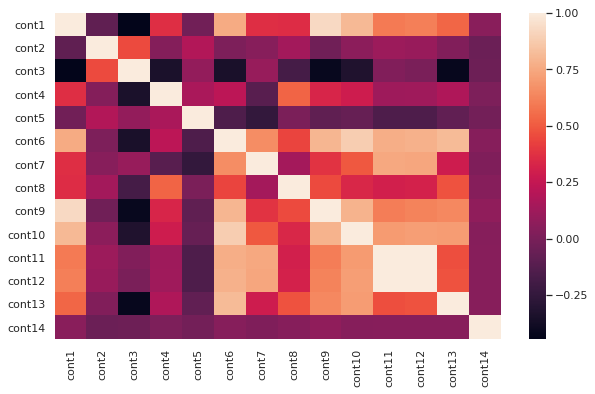

In [0]:
# Plot heat map to understand correlation between continous features 

plt.figure(figsize=(10, 6))
sns.set()
sns.heatmap(features.iloc[:,117:].corr())


###Scatter Matrix
Scatter Matrix is plotted  between each continuous features to review scatter plot distribution to understand data correlation and skewness. Here we have sampled first 2000 rows to review data distribution. 
Scatter plot visualization depicts similar correlations between features compared to what we discovered in heatmap visuals.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba6aa2ae10>,
      dtype=object)

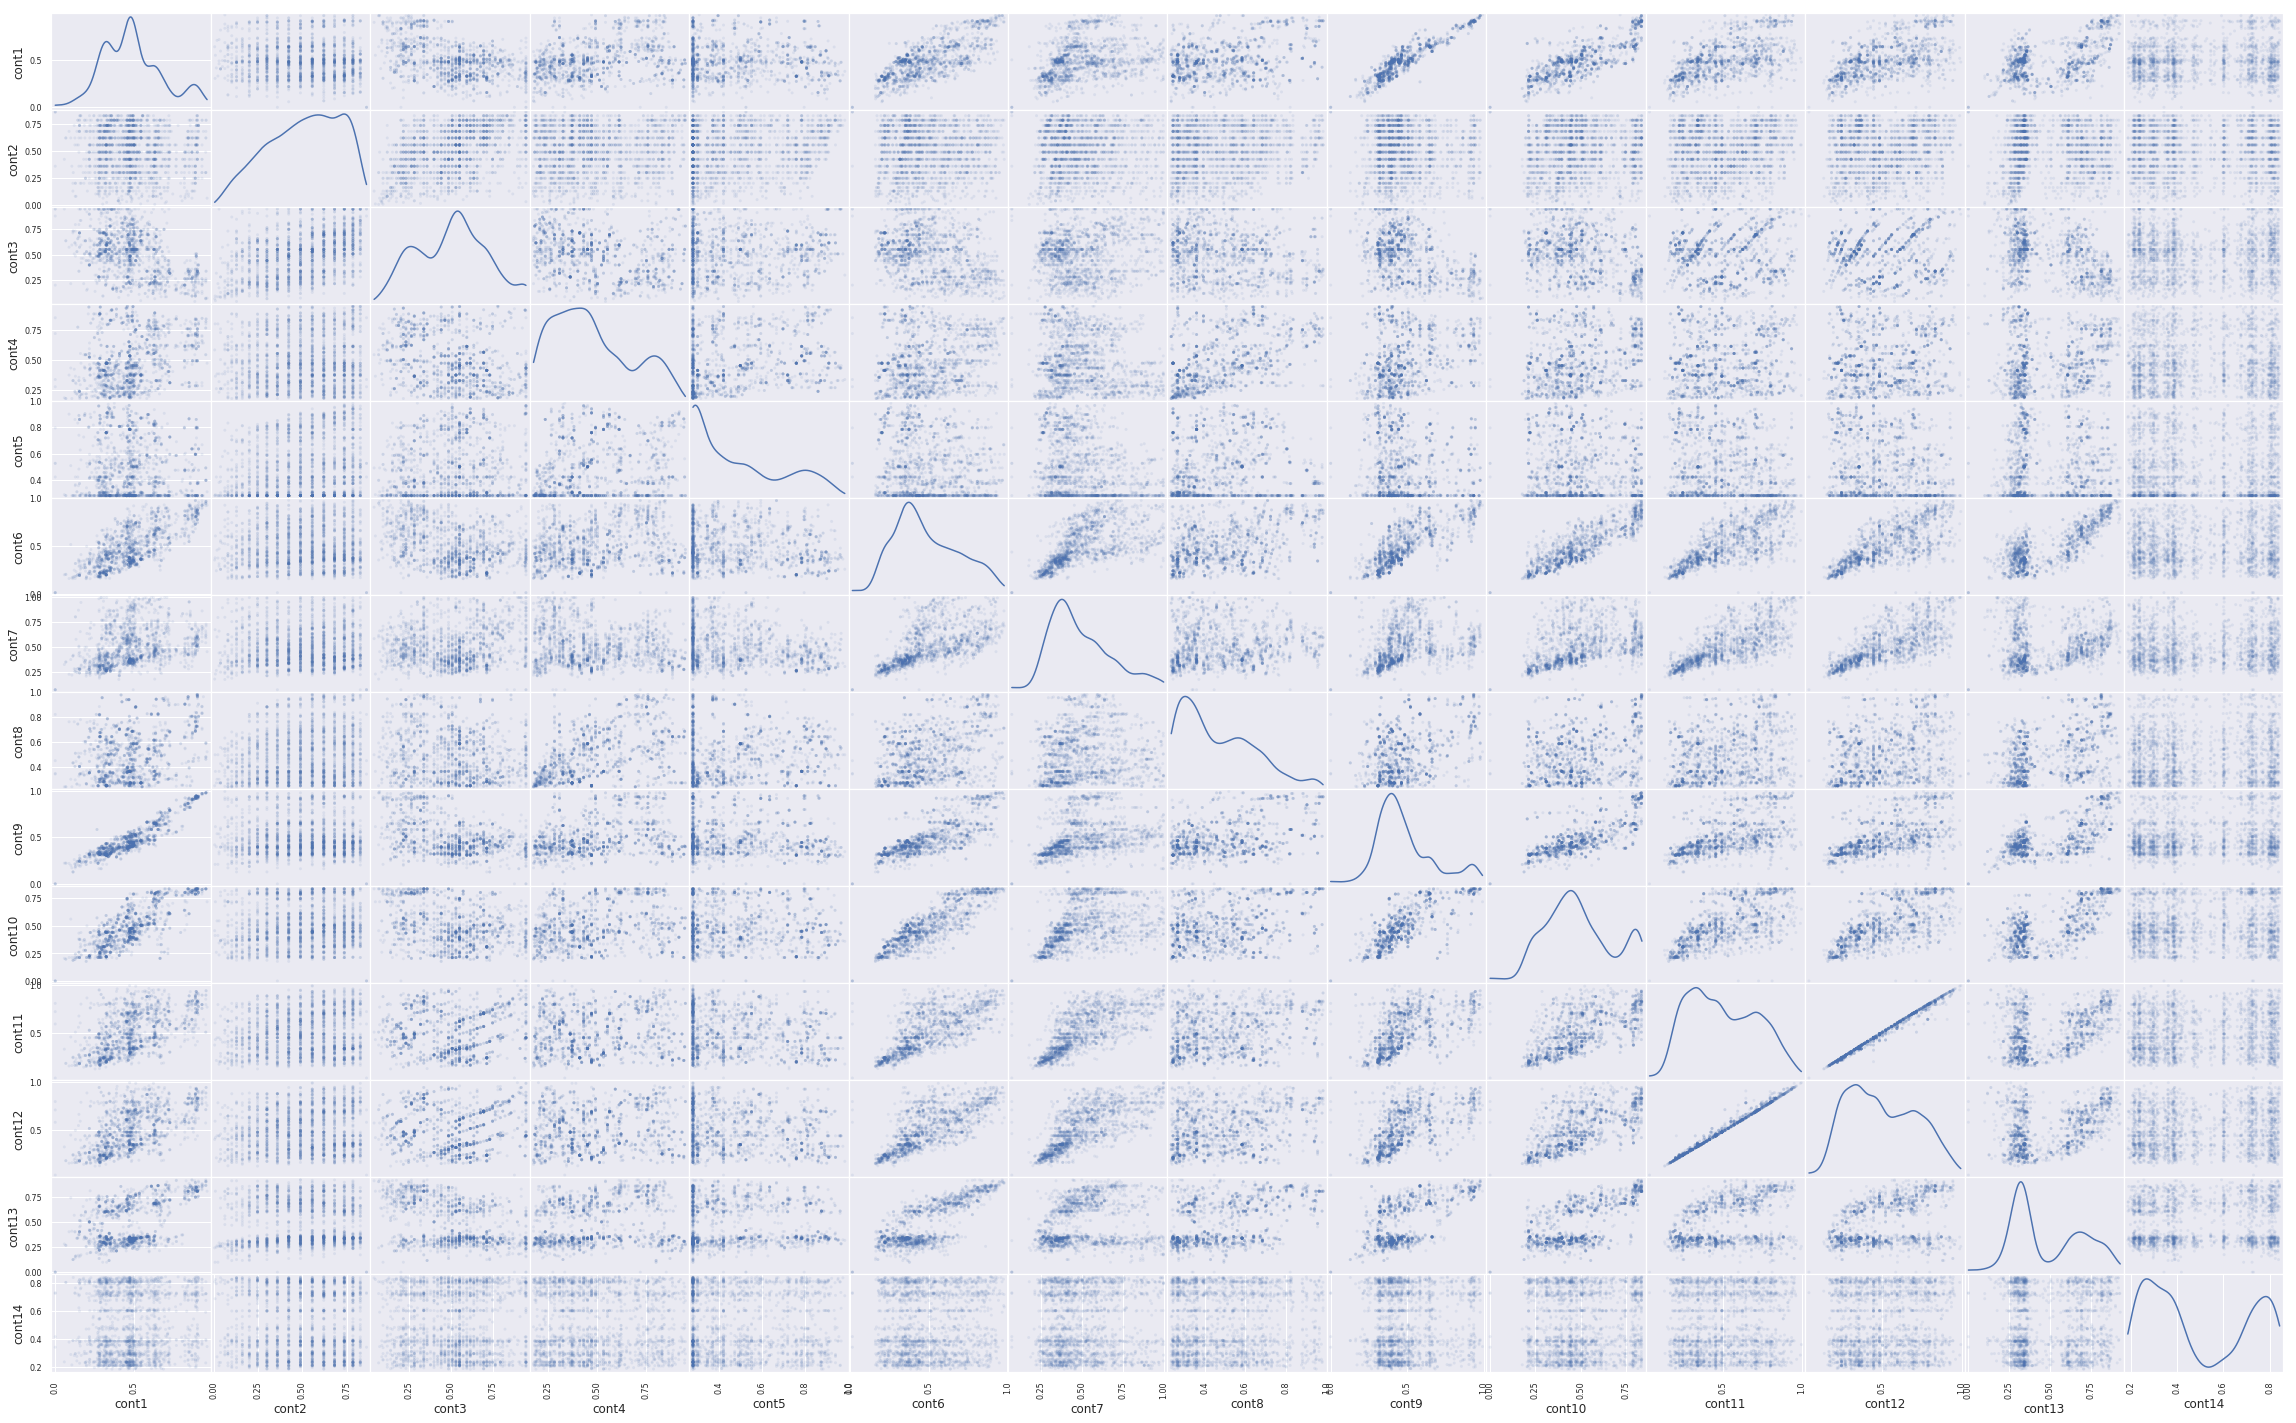

In [0]:
# Plot scatter plots to understand correlation between continuous features

pd.plotting.scatter_matrix(features.iloc[:2000,117:], alpha=0.1, figsize = (40,25), diagonal='kde')

##Model Benchmarking

Benchmark has been established on LinearRegressor model from sklearn. Training data is feed through LinearRegressor (with feature input and target) without much data preprocessing. Some of the basic preprocessing steps done on data are listed below.

*   Removed feature ‘Id’ from train and validation data as it doesn’t provide any value for Loss prediction. Its like index attribute to uniquely identify each claim row.
*   Categorical variables are one hot encoded so that numerical values are given as input to model. 

After fitting through LinearRegression(considering all default parameters), prediction is done on test data to compute MAE. Some of the very high predictions are ignored as possible outlier. 


In [0]:
# Benchmark model. Running Linear Regression on features data with split on train and val in ratio of 9:1 to obtain MSE

# Hot encode categorical features
features_bench_train = pd.get_dummies(features)

# Drop Id column from feature data
features_bench_train = features_bench_train.drop('id',axis=1)

# Log transform Loss target
loss_log_bench = np.log(loss)

# Split train and test data in ratio of 9:1
X_train, X_test, y_train, y_test = train_test_split(features_bench_train, 
                                                    loss_log_bench, 
                                                    test_size = 0.1, 
                                                    random_state = 0)


# Run Linear Regression on input train and validation data. Compute Mean absolute error. 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the test data
y_pred = regr.predict(X_test)

# Remove high outlier predictions
for i, num in enumerate(y_pred):
  if num > 1000:
    y_pred[i] = y_pred[i-1] 


#Compute MAE from prediction and truth     
print("Mean Absolute error: %.2f"
      % mean_absolute_error(np.exp(y_test), np.exp(y_pred)))


Mean Absolute error: 1275.98


##Data Preprocessing
In this section, we will perform feature engineering based on data exploration and analysis done in prior section.  

###Hot encoding
Categorical variables will be one hot encoded to numeric values from string values as we can only input numeric values to model for training. One hot encoding is done  through pandas get_dummies function which converts all categorical variable into one hot representation of numeric values. After hot encoding we observe 116 categorical features are converted into 1139 numeric features. 

In [0]:
# Hot encode categorical features and review dimension of dataset after one hot encoding, 116 cat features are converted
# into 1139 + 14 cont features + 1 id feature = 1154 features  

features = pd.get_dummies(features)
print(features.shape)

(188318, 1154)


###Seperate Categorical and Continuous feature
Here we are dropping the 'Id' column from dataframe since it of no use. Cat and Cont features are seperated so that we can perform feature transformation seperately on each of the dataset. 

In [0]:
# drop 'Id' from dataframe
features = features.drop('id',axis=1)

# Seperate continuous features
cont_features = features.iloc[:,:14]

# Seperate Categorical features
cat_features = features.iloc[:,14:]


###Principal Component Analysis on Continuous Features. 
From the data visualization on continuous features we concluded strong correlation among 6 features. We can reduce the dimensions of continuous feature by removing 3 features. This process can be through PCA to achieve dimensionality reduction. So we will set number of component = 11 as we anticipate 11 key features. 

After running PCA fit and transform we print explained variance ratio which shows these 11 features represents 99% of variance in continous feature space. 

In [0]:
# PCA on continuous features

list = []

# Instanstiate PCA with number of component = 11
pca = PCA(n_components=11)

# Perform fit on 11 features
pca.fit(cont_features)

# Perform transform
reduced_cont_feature = pca.transform(cont_features)

# print explained variance ratio to show variance for all 11 components 
list.append(pca.explained_variance_ratio_)
print(list)

[array([0.42170992, 0.14249156, 0.11176714, 0.08600408, 0.06442122,
       0.05740309, 0.03954402, 0.02668232, 0.01976975, 0.01604432,
       0.00870777])]


###Principal Component Analysis on Categorical features
Its difficult to comprehend correlation among categorical variable when large number of categorical variables are present in dataset. PCA makes this process automated when optimal number of components are initialized in fit process. Below steps illustrates process for PCA done on Categorical variable dataset. 

  - We run PCA on categorical train dataset with number of components = 1139.
  - After fit and transform we print explained variance ratio for all 1139 feature. 
  - From explained variance ratio we can conclude that first 345 captures 99% variance in data. So, we can ignore rest of dimensions as their presence won’t make much difference as far as variance is concerns. 
  - In final step we run PCA with number of components = 345. Resultant dataset represents transformed reduced categorical features dataset. 


In [0]:
# Perform PCA for dimensionality reduction. Run PCA for number of components = total number of features after hot encoding to 
#understand explained variance ratio for all dimensions

list = []

pca = PCA(n_components=1139)

# Perform fit on 1139 cat_features
pca.fit(cat_features)

# Perform transform
transformed_feature = pca.transform(cat_features)

# print explained variance ratio to show variance for all components
list.append(pca.explained_variance_ratio_)

In [0]:
# Review explained variance and derive number of dimensions to be considered for 99% variance.  

np_list = np.array(list)
np.set_printoptions(threshold=1500)
print(np_list)

[[7.96106242e-02 7.00096200e-02 4.70303287e-02 3.77362005e-02
  3.30581939e-02 2.88104569e-02 2.74226770e-02 2.33783280e-02
  2.02456730e-02 1.83931801e-02 1.75700057e-02 1.64298833e-02
  1.53714602e-02 1.45657402e-02 1.37490646e-02 1.15876750e-02
  1.07745020e-02 1.03307611e-02 9.96816024e-03 9.38824098e-03
  9.23502134e-03 9.07904985e-03 8.72246741e-03 8.69815055e-03
  8.47485814e-03 8.31786465e-03 7.54830547e-03 7.36155031e-03
  7.20590565e-03 7.15115710e-03 7.02155353e-03 6.78591128e-03
  6.65965252e-03 6.28775173e-03 6.07048896e-03 5.82300958e-03
  5.79717698e-03 5.72363231e-03 5.17529781e-03 5.06072943e-03
  5.03575911e-03 4.94948273e-03 4.90831772e-03 4.75569553e-03
  4.51001193e-03 4.49523210e-03 4.28585044e-03 4.25227783e-03
  4.20677758e-03 4.10642313e-03 4.01568656e-03 3.94283184e-03
  3.89402403e-03 3.87446702e-03 3.79899893e-03 3.61997240e-03
  3.57561725e-03 3.51486439e-03 3.46872857e-03 3.43556358e-03
  3.35766089e-03 3.29943225e-03 3.28594951e-03 3.18548475e-03
  3.1639

In [0]:
list = []

pca = PCA(n_components=345)

#perform fit on 345 dimensions 
pca.fit(cat_features)

#perform transform
reduced_cat_feature = pca.transform(cat_features)

#print explained variance ratio. 345 dimensions represents 99% variance in catergorical features 
list.append(pca.explained_variance_ratio_)
print(list)

[array([7.96106242e-02, 7.00096200e-02, 4.70303287e-02, 3.77362005e-02,
       3.30581939e-02, 2.88104569e-02, 2.74226770e-02, 2.33783280e-02,
       2.02456730e-02, 1.83931801e-02, 1.75700057e-02, 1.64298833e-02,
       1.53714602e-02, 1.45657402e-02, 1.37490646e-02, 1.15876750e-02,
       1.07745020e-02, 1.03307611e-02, 9.96816024e-03, 9.38824098e-03,
       9.23502134e-03, 9.07904985e-03, 8.72246741e-03, 8.69815055e-03,
       8.47485814e-03, 8.31786465e-03, 7.54830547e-03, 7.36155031e-03,
       7.20590565e-03, 7.15115710e-03, 7.02155353e-03, 6.78591128e-03,
       6.65965252e-03, 6.28775173e-03, 6.07048896e-03, 5.82300958e-03,
       5.79717698e-03, 5.72363231e-03, 5.17529781e-03, 5.06072943e-03,
       5.03575911e-03, 4.94948273e-03, 4.90831772e-03, 4.75569553e-03,
       4.51001193e-03, 4.49523210e-03, 4.28585044e-03, 4.25227783e-03,
       4.20677758e-03, 4.10642313e-03, 4.01568656e-03, 3.94283184e-03,
       3.89402403e-03, 3.87446702e-03, 3.79899893e-03, 3.61997240e-03,
     

###Combine Datasets
After PCA and achieving dimensionality reduction on Cat and Cont feartures, we will combine both dataset into one and review final shape

In [0]:
# After PCA combine Cat and Cont features into single dataset.  
reduced_feature = np.hstack((reduced_cat_feature,reduced_cont_feature))
reduced_feature.shape

(188318, 356)

###Data Transformation
From the prior analysis we found that Loss target feature is skewed and do not show uniform distribution may be due to outlier present in the dataset. To deal with this, we can transform data to log scale and then review skewness on log data. 

In below code implemenation we have used numpy log function to transform Loss data. Please note that 1 has been added to Loss so that if there are any low or 0 values present in Loss data then it gets properly scaled into log space. 

As we can observe, skewness is reduced after log transformation. 

In [0]:
# Review data skewness. Log transform to get normal or uniform distribution.

print("data skewness before log transform {}".format(loss.skew()))
loss_log = np.log(loss+1)
print("data skewness after log transform {}".format(loss_log.skew()))


data skewness before log transform 3.7949583775378604
data skewness after log transform 0.0966195895031505


##Metrics
Mean Absolute error (MAE) is the metric we have chosen to evaluate performance of the model. MAE is measure of absolute difference between actual loss and predicted loss averaged over all samples. 

This metric is considered for the following reasons:
  -	In this problem statement, prediction of loss value is performed which is numerical quantity. Predicting numerical value from input feature is the case of linear regression. Closer the predicted value to actual, lesser the error term and more accurate regression function can be approximated. 
  -	Another metric for regression problem is Mean Squared Error (MSE). In MSE, square of the difference is taken when evaluating error function. If the error term lies between 0 and 1 then MSE is preferred over MAE as square of number (error term) further reduces. But in given problem statement predicted Loss value can error by significant margin in hundreds or even thousands by positive or negative margin, so considering MAE is more viable as error term and is not further amplified by taking square. 


In [0]:
# Mean absolute error performance metric. 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    mae = mean_absolute_error(y_true, y_predict)
    
    # Return the score
    return mae

##Train Test Split
After performing feature engineering, we need to prepare train and test data for model training. Train data will be input to model for regression training. Once the model is trained, prediction will be done on Test data. 

We have used sklearn model.selection train_test_split function to split original transformed data into train and test dataset. Split ratio is 9:1 that is 10%  will be used as test data and 90% as train data. 

In [0]:
# Split original data into train and test in ratio of 9:1

X_train, X_test, y_train, y_test = train_test_split(reduced_feature, 
                                                    loss_log, 
                                                    test_size = 0.1, 
                                                    random_state = 0)

##Implementation
Model implementation is done on three chosen techniques listed below. These techniques are chosen based on size and complexity of data. 
  - Decision Tree Regressor
  - XGBRegressor
  - Deep NN using Keras

###DecisionTreeRegressor
DecisionTreeRegressor model training is done on train data with default parameters to get initial MAE estimate. As we can see resulted MAE of 1851.88 is way higher than benchmarked we established with LinearRegressor.  

In [0]:
#Running DecisionTreeRegressor with default parameters

#import DecisionTreeRegressor from sklearn library
from sklearn.tree import DecisionTreeRegressor

#Instantiate class
regressor = DecisionTreeRegressor()

# Fit train feature and target
regressor.fit(X_train,y_train)

# Predict on Test features
y_pred = regressor.predict(X_test)

#Print MAE from predicted and actual Loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

Mean Absolute error: 1857.98


####Model Complexity Analysis

In this process we have to find the most optimal parameter setting which gives best MAE score for DecisionTreeRegressor. I have chosen max_depth parameter with range options from 5 to 15. 

max_depth = [5,6,7,8,9,10,11,12,13,14,15]. 

Validation curve of training and testing scores are plotted with max_depth on x-axis and scores on y-axis. Scoring function ‘neg_mean_absolute_square’ is used for evaluation. 



In [0]:
# Model complexity graph for max_depth parameter
from sklearn.model_selection import validation_curve

def ModelComplexity(X, y):

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(5,15)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = None, scoring = 'neg_mean_absolute_error')
    
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
  
    print(train_mean,test_mean)
      
    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Max depth')
    plt.ylabel('Score')
    plt.ylim([-0.40,-0.60])
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.51531527 -0.50182006 -0.49039893 -0.47927349 -0.46722807 -0.45219949
 -0.43366904 -0.4106979  -0.38314416 -0.35177903] [-0.51739565 -0.50606469 -0.49778229 -0.49309786 -0.49235202 -0.49437234
 -0.50064589 -0.50959017 -0.52121885 -0.53375022]


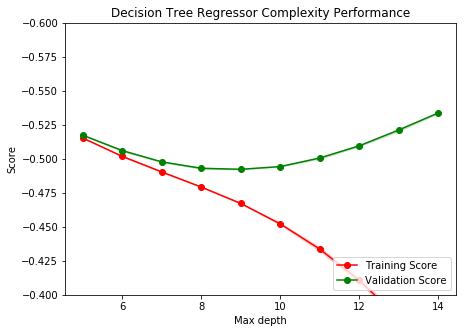

In [0]:
ModelComplexity(X_train, y_train)


####Observation:
As we can observe from model complexity plot above,


   
   

*      For max_depth=[5,6,7], both training and testing scores are low showing high bias and model is underfitting.
*   For max_depth=[10,11,12,13,14,15], training score keeps increasing as max_depth is increased from 10 to 15 but on other hand, testing score keeps decreasing as max_depth is increased from 10 to 15. This shows sign of high variance as model is overfitting and failing to generalize well. 

*   For max_depth=[8,9] we observe both train and test score are highest and there is not much divergence. Though testing score looks slightly higher for depth 9. We will run regression for both values of depth and evaluate the resulted MAE score.










In [0]:
#Running DecisionTreeRegressor with max_depth parameters

# Initialize Regressor with max_depth=8
regressor = DecisionTreeRegressor(max_depth=8)

# perform fit on train dataset
regressor.fit(X_train,y_train)

# perform predict on test dataset
y_pred = regressor.predict(X_test)

# MAE computed from predicted and actual loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

Mean Absolute error: 1358.67


In [0]:
#Running DecisionTreeRegressor with max_depth parameters

# Initialize Regressor with max_depth=9
regressor = DecisionTreeRegressor(max_depth=9)

# perform fit on train dataset
regressor.fit(X_train,y_train)

# perform predict on test dataset
y_pred = regressor.predict(X_test)

# MAE computed from predicted and actual loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

Mean Absolute error: 1357.56


Score we evaluated from max_depth parameter analysis is still higher than benchmark we established from LinearRegression so we look for more ways to optimize and check if the further improvement can done. 

Below figure depicts model complexity curve for parameter min_samples_split. It represents minimum number of samples required to split node in Decision Tree. Train and testing curve are plotted for each value of min_samples_split param options. 

min_sample_split = [350,400,450,500,550,600,650]       


In [0]:
# Model complexity graph for min_samples_split parameter

def ModelComplexity(X, y):

    # Vary the max_depth parameter from 1 to 10
    min_samples_split = [350,400,450,500,550,600,650]

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "min_samples_split", param_range = min_samples_split, cv = None, scoring = 'neg_mean_absolute_error')
    
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
  
    print(train_mean,test_mean)
      
    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(min_samples_split, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(min_samples_split, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(min_samples_split, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(min_samples_split, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Minimum Sample split')
    pl.ylabel('Score')
    pl.ylim([-0.40,-0.60])
    pl.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.44643093 -0.45115531 -0.45460177 -0.45726789 -0.45982157 -0.46171077
 -0.46373273] [-0.49080862 -0.48900832 -0.48739321 -0.48685783 -0.48634393 -0.48583033
 -0.48601742]


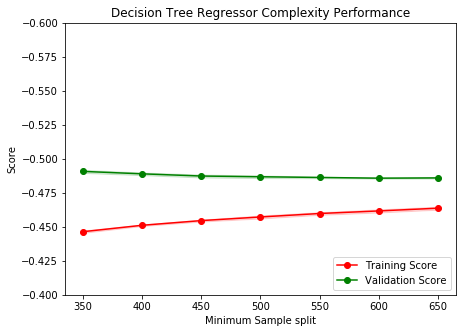

In [0]:
ModelComplexity(X_train, y_train)

Observations:
*  For values less than 500 we observe low train and testing score depicting high bias and underfit.  
*  For values 500 onwards we observe train and testing curves starts converging. Testing score almost stabilizes without further increase and train score goes down as min_samples_split increases. So, we get best optimization for value 500




In [0]:
#Running DecisionTreeRegressor with max_depth and min_samples_split parameters 

# Initialize Regressor with max_depth=9 and min_samples_split=500
regressor = DecisionTreeRegressor(max_depth=9, min_samples_split=500)

# perform fit on train dataset
regressor.fit(X_train,y_train)

# perform prediction on test dataset
y_pred = regressor.predict(X_test)

# MAE computed from predicted and actual loss values 
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))


Mean Absolute error: 1350.60


### Deep Neural Network using Keras
Keras sequential model with multi layer deep NN architecture is designed to train regressor. Below steps are followed to train deep neural network regressor.
*  Split the training dataset into train and test data so that some part of data is used for test prediction using sklearn train_test_split function. Split is done in ratio of 9:1.
*  We have three FC layer (Fully connected) in this architecture with first layer comprising of same number of units as input feature dimension. 
*  Last layer outputs single value (predicted loss value) so we have used Linear activation function.
*  Dropout layer is added after each layer except final layer to avoid overfitting. Dropout ensures that all trainable weights are given equal weightage avoiding model getting influenced by few weights. 
*  Adam Optimizer is used for this model with optimal learning rate.
*  Model is complied with Loss function of ‘Mean_Absolute_Error’ and optimizer.
*  Model Checkpoint is saved after every epoch to keep track of optimal model parameters (weight matrix) during training process to file.
*  Fit function trains the model for set batch size for all epochs. 10% of data is used for inferencing. Every time validation loss is lesser than prior value,  weights are saved to checkpoint file. 
* After training, model is loaded from last saved checkpoint with best optimal parameters. 
* Prediction is done on test data to compute and return MAE.  










In [0]:
# Deep NN training using Keras 

#Import required libraries 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint  
from keras import optimizers

# Split the original data into train and test in ratio of 9:1 
X_train, X_test, y_train, y_test = train_test_split(reduced_feature, 
                                                    loss_log, 
                                                    test_size = 0.1, 
                                                    random_state = 0)

model = Sequential()

# First Dense Layer
model.add(Dense(356, input_dim=reduced_feature.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))

# Hidden Layer
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Initialize optimizer with lr
adam = optimizers.adam(lr=0.0001)

# Compile model
model.compile(loss='mean_absolute_error', optimizer=adam)

# Define model checkpoint with filepath to save trained params
checkpointer = ModelCheckpoint(filepath='weights.best.DeepNN.hdf5', 
                               verbose=1, save_best_only=True)

# Fit Train data with 10% data used for model inferencing. 
model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=50, batch_size=250, callbacks=[checkpointer], verbose=1)

# Load best weights from saved model checkpoint
model.load_weights('weights.best.DeepNN.hdf5')

# predict on test data
y_pred = model.predict(X_test)

# Compute MAE from predicted and actual loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 152537 samples, validate on 16949 samples
Epoch 1/50
152537/152537 [==============================] - 5s 34us/step - loss: 2.0108 - val_loss: 0.4741

Epoch 00001: val_loss improved from inf to 0.47414, saving model to weights.best.DeepNN.hdf5
Epoch 2/50
152537/152537 [==============================] - 3s 17us/step - loss: 0.6691 - val_loss: 0.4609

Epoch 00002: val_loss improved from 0.47414 to 0.46089, saving model to weights.best.DeepNN.hdf5
Epoch 3/50
152537/152537 [==============================] - 3s 17us/step - loss: 0.6497 - val_loss: 0.4539

Epoch 00003: val_loss improved from 0.46089 to 0.45386, saving model to weights.best.DeepNN.hdf5
Epoch 4/50
152537/152537 [==============================] - 3s 17us/step - loss: 0.6336 - val_loss: 0.4

####Model Validation
To test robustness of this model we will run multiple iterations of model training changing the train and testing data each time model evaluates MAE.

I have chosen to iterate this process three times. In each loop train_test_split function segregates train and test data with 9:1 split ratio. Random seed has been initialized and data shuffle is true by default. 

In each training process, keras model can separate a portion of training data into a validation dataset and evaluate the performance of model on that validation dataset for each epoch.We can do this by setting the validation_split argument on the fit() function to a percentage of the size of your training dataset. Here we have specified that as 0.1.After completion of each model training iteration, its MAE score has been added to list. Once all iteration is over, mean value of MAE score is calculated with standard deviation as shown below. 


In [0]:
# For multiple iterations run model training with variations in train and test splits to test robustness of model

mae_list = []

for i in range(3):
  
  X_train, X_test, y_train, y_test = train_test_split(reduced_feature, 
                                                    loss_log, 
                                                    test_size = 0.1, 
                                                    random_state = 42)
  
  model = Sequential()
  model.add(Dense(356, input_dim=reduced_feature.shape[1], kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(200, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))
  # Compile model
  
  adam = optimizers.adam(lr=0.0001)
  
  model.compile(loss='mean_absolute_error', optimizer=adam)

  checkpointer = ModelCheckpoint(filepath='weights.shuffle.best.DeepNN.hdf5', 
                               verbose=1, save_best_only=True)

  model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=50, batch_size=250, callbacks=[checkpointer], verbose=1)

  model.load_weights('weights.shuffle.best.DeepNN.hdf5')

  y_pred = model.predict(X_test)
  
  mae = performance_metric(np.exp(y_test), np.exp(y_pred))
  
  mae_list.append(mae)
  
  print("Mean Absolute error: %.2f"
      % mae)
  
# Print all MAE scores from multiple iterations
print(mae_list)

# Print mean MAE score
print(np.mean(mae_list))

# Print standard deviation for MAE
print(np.std(mae_list))

Train on 152537 samples, validate on 16949 samples
Epoch 1/50
152537/152537 [==============================] - 3s 19us/step - loss: 2.0002 - val_loss: 0.4699

Epoch 00001: val_loss improved from inf to 0.46994, saving model to weights.shuffle.best.DeepNN.hdf5
Epoch 2/50
152537/152537 [==============================] - 2s 15us/step - loss: 0.6694 - val_loss: 0.4558

Epoch 00002: val_loss improved from 0.46994 to 0.45578, saving model to weights.shuffle.best.DeepNN.hdf5
Epoch 3/50
152537/152537 [==============================] - 2s 15us/step - loss: 0.6504 - val_loss: 0.4467

Epoch 00003: val_loss improved from 0.45578 to 0.44673, saving model to weights.shuffle.best.DeepNN.hdf5
Epoch 4/50
152537/152537 [==============================] - 2s 16us/step - loss: 0.6348 - val_loss: 0.4434

Epoch 00004: val_loss improved from 0.44673 to 0.44344, saving model to weights.shuffle.best.DeepNN.hdf5
Epoch 5/50
152537/152537 [==============================] - 3s 18us/step - loss: 0.6214 - val_loss: 0

###XGBRegressor

XGBRegressor is parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as in our case. It is an implementation of gradient boosted decision trees designed for speed and performance. 
The two reasons to use XGBRegressor

*  Bagging and Boosting features
*  Model Performance


I have used XGBRegressor API from XGBoost class. It has lots of trainable parameters. The ones used in training model are listed below:

*   n_estimator = It’s an int value which represents number of trees to fit
*   booster = Specify which booster to use: gbtree, gblinear or dart 
*  subsample = Subsample ratio of the training instance 

Boosting and Bagging process can be computationally very extensive and time consuming. With large dataset it becomes worse unless appropriate params are tuned to optimal values. After instantiating XGBRegressor with optimal parameters, model is fitted with train data features and Loss target variable. Prediction is done on trained model with test data and finally MAE is computed and returned based on ground truth and predicted values. 


First, I tried setting booster to ‘gblinear’ thinking from linear regression perspective, but results were not good or even worse than benchmark. So, the next step was to set subsample size which brought great improvements.  It denotes the fraction of observations to be randomly samples for each tree. Lower values make the algorithm more conservative and prevents overfitting, but too small values might lead to under-fitting.

With default value of subsample (subsample=1) we further noticed slight improvement which refers to fact that much of the rows represents similar correlation meaning random sample of data to much extend can fully represent whole dataset to derive predictions. 


In [0]:
# Import XGBRegressor from xgboost   
from xgboost import XGBRegressor

# Instantiate Regressor with high estimator and gblinear booster 
model = XGBRegressor(n_estimators=1000, booster='gblinear')

# fit model on train data
xgb = model.fit(X_train, y_train)

# predict model on test data 
y_pred = xgb.predict(X_test)

# Compute MAE from predicted and actual loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute error: 1499.38


In [0]:
# Instantiate Regressor with high estimator and subsample size of 0.5
model = XGBRegressor(n_estimators=1000, subsample=0.5)

# fit model on train data
xgb = model.fit(X_train, y_train)

# predict model on test data 
y_pred = xgb.predict(X_test)

# Compute MAE from predicted and actual loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute error: 1202.45


In [0]:
# Instantiate Regressor with high estimator
model = XGBRegressor(n_estimators=1000)

# fit model on train data
xgb = model.fit(X_train, y_train)

# predict model on test data 
y_pred = xgb.predict(X_test)

# Compute MAE from predicted and actual loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute error: 1201.28


##Results
Comparing the results from three regression model, we select the one as final model which gives best prediction and lowest MAE. Here, I have taken best MAE for each of the model evaluated earlier.

|   Model       	 |    MAE   |
| -----------------------| ---------|
| DecisionTreeRegressor  | 1350.60  |
| LinearRegression | 1275.98  |
| XGBRegressor  	 | 1201.28  |
| Deep NN  		 | 1166.49  |

Deep NN outperforms the other models in evaluation process. XGBRegressor and Deep NN performs better than benchmark established with LinearRegression whereas DecisionTreeRegressor fails to perform. 

## Preprocessing Test data
To evaluate Loss on test data provided in kaggle competition, we first need to perform some data processing so that it can be feeded to model for prediction.

In [0]:
# Load test data from gdrive and review shape

dataset_test = pd.read_csv('gdrive/My Drive/allstate-claims-severity/test.csv')
dataset_test.shape

(125546, 131)

In [0]:
# Hot encode test features with pandas get_dummies function.
features_test = pd.get_dummies(dataset_test)

# drop Id column from test data 
features_test = features_test.drop('id',axis=1)

# separate categorical and continuous features into different datasets. 
cont_test_features = features_test.iloc[:,:14]
cat_test_features = features_test.iloc[:,14:]


# perform PCA on continuous features with 11 components
from sklearn.decomposition import PCA
list = []

pca = PCA(n_components=11)
pca.fit(cont_test_features)

reduced_cont_test_feature = pca.transform(cont_test_features)

# perform PCA on categorical features with 345 components
pca = PCA(n_components=345)
pca.fit(cat_test_features)

reduced_cat_test_feature = pca.transform(cat_test_features)

# combine cat and cont features
reduced_test_feature = np.hstack((reduced_cat_test_feature,reduced_cont_test_feature))
reduced_test_feature.shape


(125546, 356)

##Free Form Visualization

In this section, I have done visualization on test dataset provided in Kaggle competition. Though we don’t have true predictions on test data but can get some visuals on predicted values obtained from running test data on trained model. 

Test dataset has undergone similar data transformation (PCA) as what we did for train dataset. Model is loaded from the saved checkpoint (created during training process) and final prediction is run on all the test dataset rows 125546. 

Below figures depicts predicted log output. 


7.685844 0.55201626 6.301302 10.73945 7.5953493


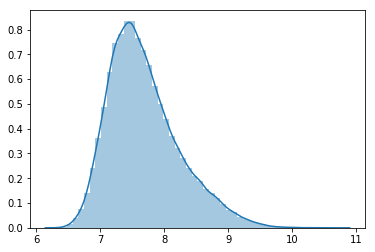

In [0]:
import scipy.stats as stats

model = Sequential()
model.add(Dense(356, input_dim=reduced_feature.shape[1], kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
# Compile model
adam = optimizers.adam(lr=0.0001)
model.compile(loss='mean_absolute_error', optimizer=adam)

model.load_weights('weights.best.DeepNN.hdf5')

y_pred = model.predict(reduced_test_feature)

h = y_pred
h.sort()
hmean = np.mean(h)
hstd = np.std(h)
hmin = np.amin(h)
hmax = np.amax(h)
hmedian = np.median(h)

print(hmean,hstd,hmin,hmax,hmedian)

sns.distplot(h); 

Below figure shows actual predicted distribution when converted from log scale to normal scale. 

2595.5103 1931.6649 545.2814 46140.688 1988.9246


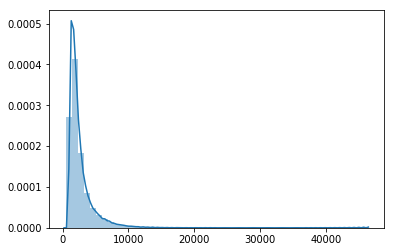

In [0]:
h = np.exp(y_pred)
h.sort()
hmean = np.mean(h)
hstd = np.std(h)
hmin = np.amin(h)
hmax = np.amax(h)
hmedian = np.median(h)

print(hmean,hstd,hmin,hmax,hmedian)

sns.distplot(h); 

As we can observe much of the predicted Loss lies between 500 to 10000. There are few very high predictions as can be seen from long tail stretching more beyond 40000. 

Reviewing stats from predicted loss we conclude much of the Loss value is around 1988.92 with some difference from mean of 2595.51 as there are few high predictions which are stretching mean higher than median. 

-	Mean – 2595.51
-	Standard Deviation – 1931.66
-	Minimum – 545.28
-	Maximum – 46140.69
-	Median – 1988.92


Now performing visualization on training data, we see similar normalization pattern in Loss value in log scale and actual scale. 

7.685907513651465 0.81130722808674 0.5128236264286637 11.703655322715969 7.6575521328732545


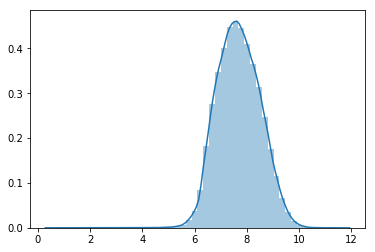

In [0]:
h = np.array(loss_log)
h.sort()
hmean = np.mean(h)
hstd = np.std(h)
hmin = np.amin(h)
hmax = np.amax(h)
hmedian = np.median(h)

print(hmean,hstd,hmin,hmax,hmedian)

sns.distplot(h); 

3037.3376856699833 2904.078475789075 0.67 121012.25 2115.5699999999997


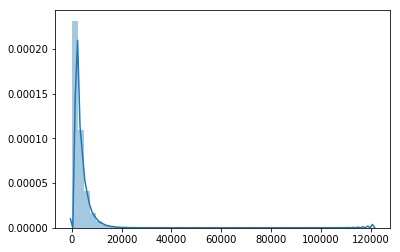

In [0]:
h = np.array(loss)
h.sort()
hmean = np.mean(h)
hstd = np.std(h)
hmin = np.amin(h)
hmax = np.amax(h)
hmedian = np.median(h)

print(hmean,hstd,hmin,hmax,hmedian)

sns.distplot(h); 

-	Mean – 3037.34
-	Standard Deviation – 2904.08
-	Minimum – 0.67
-	Maximum – 121012.25
-	Median – 2115.57

Like in test data, here also we observe few of the high loss values stretches mean higher than median.  

Its interesting to observe both Train and Test data follows similar data distribution pattern and its also evident from the fact that these are auto insurance claims reported by Allstate.